In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.corr()['isFraud'].sort_values()

C:\Users\USER\AppData\Local\Temp\ipykernel_6364\668052130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['isFraud'].sort_values()


newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_6364\3616101351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=False,cmap='viridis')


<Axes: >

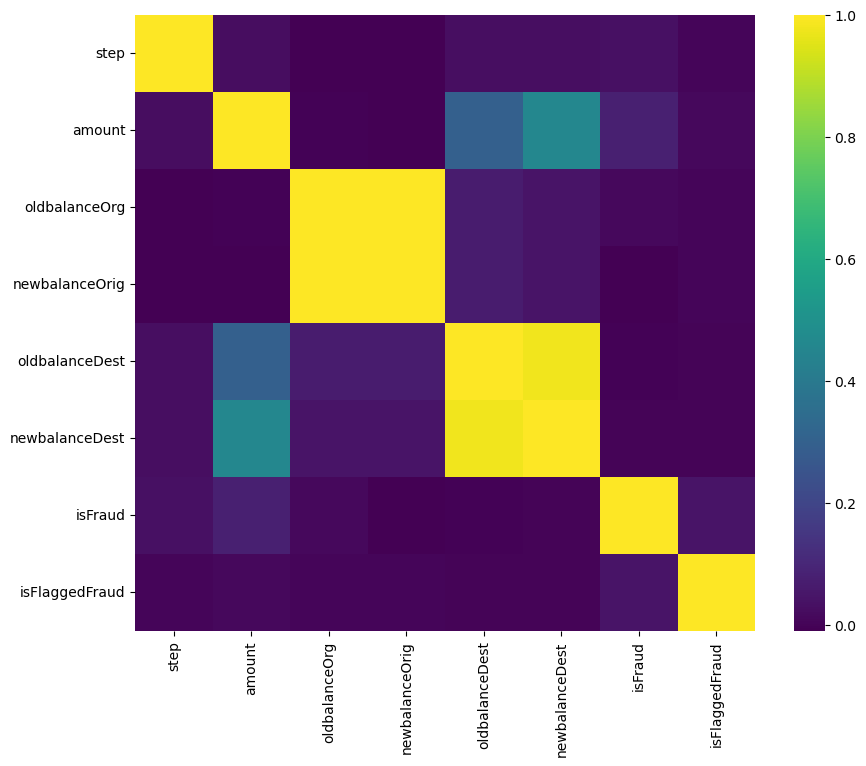

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=False,cmap='viridis')

In [7]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [8]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

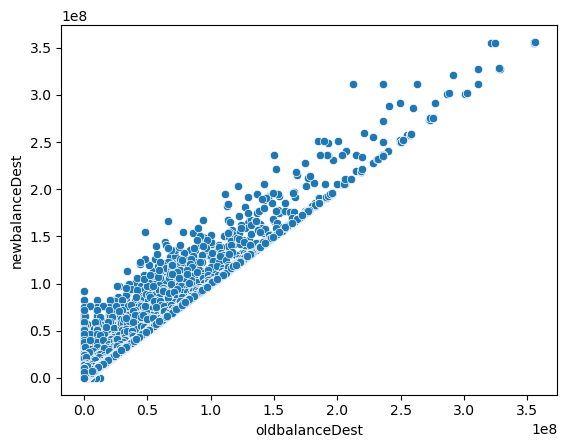

In [9]:
sns.scatterplot(x='oldbalanceDest',y='newbalanceDest',data=df)

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

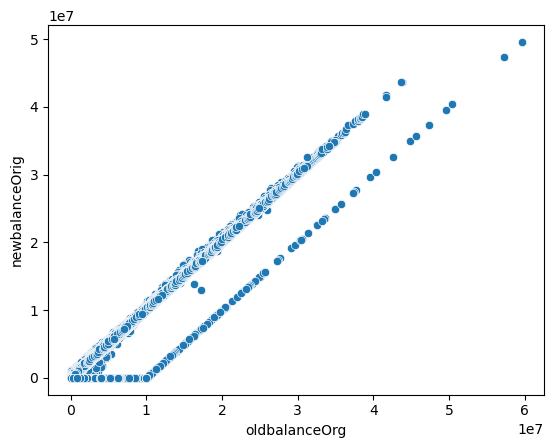

In [10]:
sns.scatterplot(x='oldbalanceOrg',y='newbalanceOrig',data=df)

In [11]:
df['type'].nunique()

5

<Axes: xlabel='isFraud', ylabel='amount'>

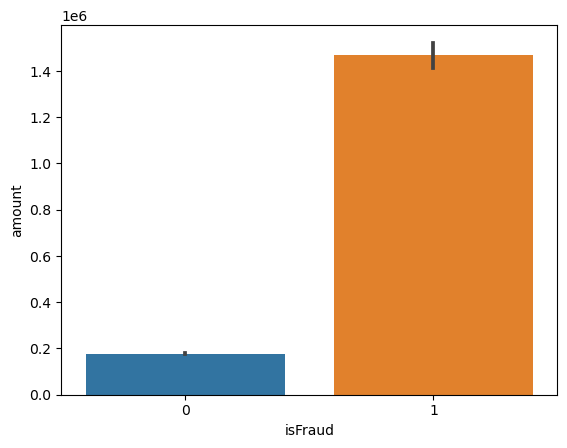

In [12]:
sns.barplot(x='isFraud',y='amount',data=df)

In [13]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

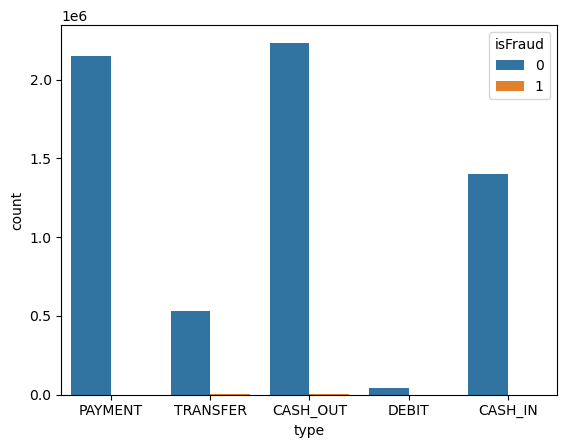

In [14]:
sns.countplot(df,x='type',hue='isFraud')

In [15]:
type_ = df[df['isFraud']==0].groupby('type').count()['isFraud']

In [16]:
type_1 = df[df['isFraud']==1].groupby('type').count()['isFraud']

In [17]:
type_/(type_+type_1)

type
CASH_IN          NaN
CASH_OUT    0.998160
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.992312
Name: isFraud, dtype: float64

In [18]:
dum = pd.get_dummies(df['type'],drop_first=True)

df = pd.concat([df.drop('type',axis=1),dum],axis=1)

In [19]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [20]:
df['nameOrig'] = df['nameOrig'].apply(lambda x: int(x[1:]))

In [21]:
df['nameDest'] = df['nameDest'].apply(lambda x: int(x[1:]))

In [22]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,1,0


In [23]:
outliers = []

def detect_outliers(outs):
    max_ = 3
    mean_ = np.mean(outs)
    std_ = np.std(outs)
     
    for val in outs:
        score = (val - mean_)/std_
        if np.abs(score)>max_:
            outliers.append(val)
            return outliers

In [24]:
outs_1 = detect_outliers(df['amount'])

In [25]:
print(outs_1)

[2421578.09]


In [26]:
df[df['amount']==3776389.09] 

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1153,1,3776389.09,197491520,0.0,0.0,1883840933,10138670.86,16874643.09,0,0,0,0,0,1


In [27]:
df.drop([1153],inplace=True)

In [28]:
df[df['oldbalanceDest']==13915059.95] 

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1324,1,26295.3,1198817209,8723514.56,8749809.86,1883840933,13915059.95,16874643.09,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(df.drop('isFraud',axis=1))

MinMaxScaler()

In [32]:
df.shape

(6362619, 14)

In [33]:
scaled = scaler.transform(df.drop('isFraud',axis=1))

In [38]:
df_1 = pd.DataFrame(scaled,columns=[['step','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']])
df_1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.0,0.000106,0.573232,0.002855,0.003233,0.921910,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000020,0.776045,0.000357,0.000391,0.951943,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000002,0.607914,0.000003,0.000000,0.257634,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000002,0.391194,0.000003,0.000000,0.018159,0.000059,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000126,0.953925,0.000697,0.000603,0.573090,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_1
y = df['isFraud']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [45]:
# !pip install vecstack

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model_3 = RandomForestClassifier()

In [56]:
model_3.fit(X_train, y_train)
 
pred_final = model_3.predict(X_test)
 

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(y_test,pred_final))
print()
print(classification_report(y_test,pred_final))

[[2096935      33]
 [    670    2027]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096968
           1       0.98      0.75      0.85      2697

    accuracy                           1.00   2099665
   macro avg       0.99      0.88      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



Text(0.5, 0, 'Random Forest Feature Importance')

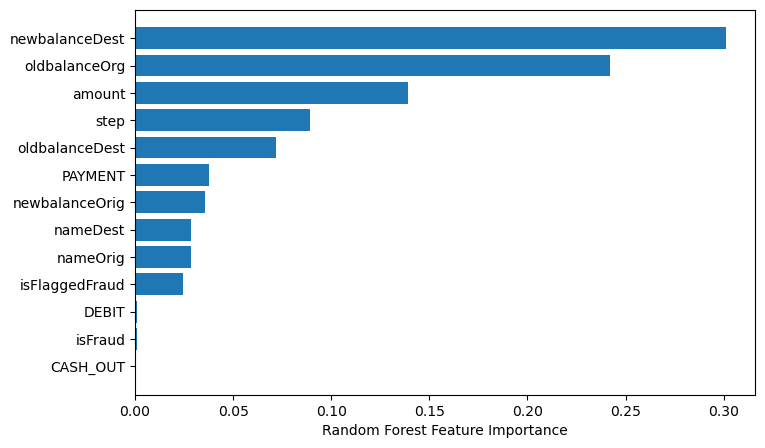

In [63]:
plt.figure(figsize=(8,5))
new_idx = model_3.feature_importances_.argsort()
plt.barh(df.columns[new_idx],model_3.feature_importances_[new_idx])
plt.xlabel("Random Forest Feature Importance")